Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [1]:
from pydataset import data
import pandas as pd
import numpy as np


mpg = data('mpg') # load the dataset and store it in a variable
#data('mpg', show_doc=True) # view the documentation for the dataset
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


1a) On average, which manufacturer has the best miles per gallon?

In [ ]:
#adding a column called avg_mpg_overall that holds the average between city and highway
overall_mpg = mpg.assign(avg_mpg_overall = (mpg.cty + mpg.hwy) / 2)
#creating a subdateframe called group_mpg that groups values by the manufacturer
#creating a dictionary that will show the mean for the avg_mpg_overall, city and highway mpg
group_mpg = overall_mpg.groupby('manufacturer').agg({'avg_mpg_overall':'mean','cty':'mean','hwy':'mean'})
#showing the best overall mileage from avg_mpg_overall
group_mpg.sort_values(by = ['avg_mpg_overall'], ascending = False).head(1)

1b) How many different manufacturers are there?

In [ ]:
#using ".agg('nunique')" to find the number of different unique manufacturers
mpg.manufacturer.agg('nunique')

#alt solution
# len(mpg.manufacturer.unique())

1c) How many different models are there?

In [ ]:
#using ".agg('nunique')" to find the number of different unique models
mpg.model.agg('nunique')

#alt solution
# len(mpg.model.unique())

1d) Do automatic or manual cars have better miles per gallon?

In [ ]:
#creating a new dataframe called auto_man with a new column called avg_mpg_overall
auto_man = mpg.assign(avg_mpg_overall = (mpg.cty + mpg.hwy) / 2)
#creating a new column called trans_cat that will show all automatics if the trans column starts with a or manual otherwise
auto_man['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
#groupby trans_cat and use .agg to show the mean of anf_mpg_overall, city and highway
auto_man_comparison = auto_man.groupby('trans_cat').agg({'avg_mpg_overall':'mean','cty':'mean','hwy':'mean'})
auto_man_comparison

2) Copy the users and roles dataframes from the examples above. What do you think a right join would look like?

In [ ]:
# copying users df
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

# copying roles df
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
#how='right' to show a right join
pd.merge(users, roles, left_on = 'role_id', right_on='id', how = 'right')

2) An outer join? 

In [ ]:
#how='outer' to show an outer join
pd.merge(users, roles, left_on = 'role_id', right_on='id', how = 'outer')

2) What happens if you drop the foreign keys from the dataframes and try to merge them?

In [ ]:
#dropping the foreign key called 'role_id'
users = users.drop(columns = ['role_id'])
#trying to merge again
pd.merge(users, roles, left_on = 'role_id', right_on='id')
# you will get an error message "key error role_id"

3a) Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [2]:
#from my env.py file, import host, username, and password
from env import host, username, password
#creating a function called get_db_url that will intake username, host, password, 
#and database respectifully, and return a url
def get_db_url(username, host, password, database):
    url = (f'mysql+pymysql://{username}:{password}@{host}/{database}')
    return (url)

3b) Use your function to obtain a connection to the employees database.

In [3]:
#'read_sql' will run a query using the created function from above
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url(username, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


3c) Once you have successfully run a query:
Intentionally make a typo in the database url. What kind of error message do you see?


In [5]:
#modified url to be incorrect
def url_typo(username, host, password, db):
    url = (f'incorrectmysql+pymysql://{username}:{password}@{host}/{db}')
    return (url)
#running another query 
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url_typo(username, host, password, 'employees'))
#you will recieve the error message "Can't load plugin"

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:incorrectmysql.pymysql

Intentionally make an error in your SQL query. What does the error message look like?

In [6]:
#incorrect sql query
pd.read_sql('incorrectSELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url(username, host, password, 'employees'))
#you will recieve the error message "You have an error in your SQL syntax"

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'incorrectSELECT * FROM employees LIMIT 5 OFFSET 50' at line 1")
[SQL: incorrectSELECT * FROM employees LIMIT 5 OFFSET 50]
(Background on this error at: http://sqlalche.me/e/f405)

3d) Read the employees and titles tables into two separate dataframes

In [7]:
#reading employees table into subdataframe
employees = pd.read_sql('SELECT * FROM employees', get_db_url(username, host, password, 'employees'))
#reading titles table into subdataframe
titles = pd.read_sql('SELECT * FROM titles', get_db_url(username, host, password, 'employees'))
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [8]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


3e) Visualize the number of employees with each title.

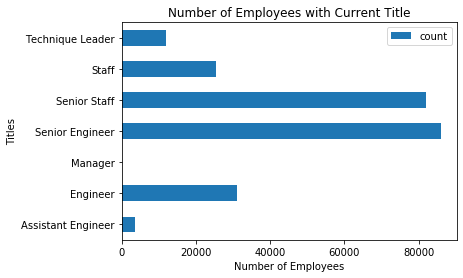

In [10]:
# importing matplotlib with alias plt
import matplotlib.pyplot as plt
#creating a subdataframe called 'current_titles' that holds only the current titles 
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')]
#groupby title and counting the number of employees per title
counting_titles = current_titles.groupby('title').emp_no.agg(['count'])
#display results in a horizontal bar graph
counting_titles.plot.barh()
#creating a title
plt.title('Number of Employees with Current Title')
#creating a y axis title
plt.ylabel('Titles')
#creating a x axis title
plt.xlabel('Number of Employees')
#showing the plot created
plt.show()

3f) Join the employees and titles dataframes together.

In [11]:
#inner joining the employees and titles dataframes together
pd.merge(employees, titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


3g) Visualize how frequently employees change titles.

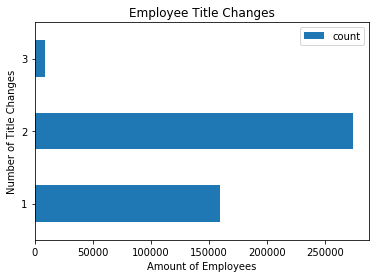

In [13]:
#creating a subdataframe called agg_emp_titles that groupby emp_no and count the number of titles by that respective employee
agg_emp_titles = titles.groupby('emp_no').title.agg(['count'])
#merge titles table with agg_emp_titles
agg_emp_titles = pd.merge(titles, agg_emp_titles, left_on = 'emp_no', right_on = 'emp_no')
#groupby counts and counting the number employees by that grouped count
grouped_agg_emp_titles = agg_emp_titles.groupby('count').emp_no.agg(['count'])
#creating a horizontal bar graph from subdataframe above
grouped_agg_emp_titles.plot(kind = 'barh')
#creating a title
plt.title('Employee Title Changes')
#creating a y axis label
plt.ylabel('Number of Title Changes')
#creating a x axis label
plt.xlabel('Amount of Employees')
#showing the plot created
plt.show()

3h) For each title, find the hire date of the employee that was hired most recently with that title.

In [14]:
#creating a subdataframe that holds current titles of employees
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 
#merging employees and current_titles table
titles_emps = pd.merge(employees, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
#groupby title and displaying the date of the most recent hire
recent_hires = titles_emps.groupby('title').hire_date.agg(['max'])
recent_hires

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-23
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-15


3i) Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [ ]:
#reading dept_emp into a dataframe 
dept_emp = pd.read_sql('SELECT * FROM dept_emp', get_db_url(username, host, password, 'employees'))
#reading departments into dataframe
depts = pd.read_sql('SELECT * FROM departments', get_db_url(username, host, password, 'employees'))
#creating a subdataframe that filters out the current employees in each department
current_dept = dept_emp[dept_emp['to_date'] >= pd.to_datetime('today')]
#creating a subdataframe that filers out the current titles of the employees
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 
#using innerjoin to join the current employees in a department
depts_and_dept_emps = pd.merge(current_dept, depts, left_on = 'dept_no', right_on = 'dept_no', how = 'inner')
#using innerjoin to join the current titles to the previous subdataframe
titles_depts = pd.merge(depts_and_dept_emps, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
#creating crosstab for dept_name and titles
titles_depts_crosstab = pd.crosstab(titles_depts.dept_name, titles_depts.title)
titles_depts_crosstab

4) Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [16]:
#reading chipotle database using get_db_url function
chipotle = pd.read_sql('SELECT * FROM orders', get_db_url(username, host, password, 'chipotle'))
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


4a) What is the total price for each order?

In [17]:
#creating a dataframe with a new column that will strip the '$' and change the data into a float
chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))
#creating a subdataframe and groupby the order_id then sum each item in the order
total_price = chipotle_money.groupby('order_id').money_price.agg(['sum'])
total_price

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


4b) What are the most popular 3 items?

In [18]:
# creating a subdataframe that groups each item by name and sums the amount of items
chipotle_item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])
#displays the 3 most ordered items
chipotle_item_counts.nlargest(3, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


4c) Which item has produced the most revenue?

In [20]:
#creating a subdataframe that groupby item_name and sum the total ammount spent
chipotle_item_revenue = chipotle_money.groupby('item_name').money_price.agg(['sum'])
#display the items that produces the most revenue
chipotle_item_revenue.nlargest(1, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,7342.73
